In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Load the relevant data

In [5]:
df_mrt_lrt = pd.read_csv(r'../../../Data/CSISG/Correlation Data/agg_mrt_lrt.csv')
df_taxi = pd.read_csv(r'../../../Data/CSISG/Correlation Data/agg_taxi.csv')
df_app = pd.read_csv(r'../../../Data/CSISG/Correlation Data/agg_app.csv')
df_bus = pd.read_csv(r'../../../Data/CSISG/Correlation Data/agg_bus.csv')

# Correlation of MRT/LRT

In [3]:
df_mrt_lrt.head()

,year,sub_sector_verbatim,planning_area,weight_of_market_share,customer_expectations_score,perceived_overall_quality_score,perceived_value_score,customer_satisfaction_score,customer_loyalty‎_user_trust_score,train_agg_service_info,train_agg_customer_service,train_agg_convenience,train_agg_comfort,train_agg_safety
0,2019,MRT/LRT,BUKIT PANJANG,0.04,66.14,81.39,83.84,70.82,70.14,9,8,8,7,7
1,2019,MRT/LRT,SENGKANG,0.19,70.73,62.34,61.62,58.83,67.12,8,7,6,6,6
2,2019,MRT/LRT,SENGKANG,0.19,70.45,59.67,72.73,59.24,62.39,7,7,6,6,6
3,2019,MRT/LRT,PUNGGOL,0.00,88.61,70.06,77.78,59.71,66.35,8,7,7,8,8
4,2019,MRT/LRT,PUNGGOL,0.00,62.88,65.95,60.60,59.24,57.66,7,4,7,7,6


In [6]:
df_mrt_lrt_corr_matrix = df_mrt_lrt.corr(method = 'spearman').iloc[7:, 2:6]
df_mrt_lrt_corr_matrix

,customer_expectations_score,perceived_overall_quality_score,perceived_value_score,customer_satisfaction_score
train_agg_service_info,0.125020,0.249564,0.287731,0.187195
train_agg_customer_service,0.154376,0.326536,0.311167,0.233210
train_agg_convenience,0.206474,0.366520,0.350211,0.351679
train_agg_comfort,0.075100,0.263847,0.269251,0.155622
train_agg_safety,0.363029,0.592499,0.469011,0.602082


In [10]:
df_mrt_lrt_corr_matrix =df_mrt_lrt_area_corr_matrix = round(df_mrt_lrt.groupby(['planning_area']).corr(method = 'spearman'), 2).dropna(axis = 0, how = 'all').fillna("")
df_mrt_lrt_area_corr_matrix = df_mrt_lrt_area_corr_matrix.drop(['customer_expectations_score', 'customer_expectations_score', 'perceived_value_score', 'customer_satisfaction_score', 'perceived_overall_quality_score', 'customer_loyalty_user_trust_score'], axis = 0, level = 1)
df_mrt_lrt_area_corr_matrix = df_mrt_lrt_area_corr_matrix.drop(['train_agg_service_info', 'train_agg_customer_service', 'train_agg_convenience', 'train_agg_comfort', 'train_agg_safety'], axis = 1)
df_mrt_lrt_area_corr_matrix.to_csv(r'../../../Data/CSISG/Correlation Data/df_mrt_lrt_area_corr_matrix.csv')
df_mrt_lrt_area_corr_matrix

year  \
planning_area                                            
ANG MO KIO    year                                   1   
              weight_of_market_share                 0   
              customer_loyalty‎_user_trust_score -0.89   
              train_agg_service_info              0.89   
              train_agg_customer_service          0.94   
              train_agg_convenience               0.71   
              train_agg_comfort                   0.94   
              train_agg_safety                   -0.45   
BEDOK         year                                   1   
              weight_of_market_share             -0.67   
              customer_loyalty‎_user_trust_score -0.44   
              train_agg_service_info              0.91   
              train_agg_customer_service          0.73   
              train_agg_convenience               0.75   
              train_agg_comfort                   0.91   
              train_agg_safety                    -0.4   
BISHAN        year                                   1   
              weight_of_market_share                -1   
              customer_loyalty‎_user_trust_score    -1   
              train_agg_service_info                -1   
              train_agg_customer_service            -1   
              train_agg_convenience                 -1   
              train_agg_comfort                     -1   
              train_agg_safety                      -1   
BUKIT BATOK   year                                   1   
              weight_of_market_share              0.01   
              customer_loyalty‎_user_trust_score -0.09   
              train_agg_service_info              0.88   
              train_agg_customer_service          0.49   
              train_agg_convenience               0.48   
              train_agg_comfort                   0.88   
              train_agg_safety                   -0.56   
BUKIT MERAH   year                                   1   
              weight_of_market_share                 0   
              customer_loyalty‎_user_trust_score -0.29   
              train_agg_service_info             -0.65   
              train_agg_customer_service         -0.44   
              train_agg_convenience              -0.91   
              train_agg_comfort                   -0.3   
              train_agg_safety                   -0.65   
BUKIT PANJANG year                                   1   
              weight_of_market_share             -0.38   
              customer_loyalty‎_user_trust_score -0.09   
              train_agg_service_info              0.83   
              train_agg_customer_service          0.83   
              train_agg_convenience                0.8   
              train_agg_comfort                   0.85   
              train_agg_safety                    0.09   
CHOA CHU KANG year                                   1   
              weight_of_market_share               0.6   
              customer_loyalty‎_user_trust_score  0.36   
              train_agg_service_info              0.84   
              train_agg_customer_service          0.77   
              train_agg_convenience                0.8   
              train_agg_comfort                    0.9   
              train_agg_safety                    0.54   
CLEMENTI      year                                   1   
              weight_of_market_share              0.22   
              customer_loyalty‎_user_trust_score  0.89   
              train_agg_service_info               0.8   
              train_agg_customer_service          0.65   
              train_agg_convenience               0.78   
              train_agg_comfort                   0.88   
              train_agg_safety                       0   
GEYLANG       year                                   1   
              weight_of_market_share              0.24   
              customer_loyalty‎_user_trust_score -0.89   
              train_agg_service_info            

# Correlation of Taxi

In [11]:
df_taxi.head()

,year,sub_sector_verbatim,planning_area,weight_of_market_share,customer_expectations_score,perceived_overall_quality_score,perceived_value_score,customer_satisfaction_score,customer_loyalty‎_user_trust_score,taxi_agg_service_info,taxi_agg_customer_service,taxi_agg_convenience,taxi_agg_comfort,taxi_agg_safety,taxi_agg_affordability
0,2019,Taxi Services,BUKIT PANJANG,0.70,62.61,70.06,71.71,62.99,66.35,8,7,9,8,7,8
1,2019,Taxi Services,BUKIT PANJANG,2.68,59.34,73.67,72.73,81.46,87.70,9,8,7,7,8,10
2,2019,Taxi Services,SENGKANG,0.70,95.94,77.78,66.67,76.90,74.10,8,7,8,8,8,9
3,2019,Taxi Services,PUNGGOL,2.68,67.19,74.39,83.84,74.50,63.51,7,8,7,8,8,8
4,2019,Taxi Services,PUNGGOL,0.15,73.72,74.17,66.67,62.99,60.50,7,8,8,8,7,8


In [12]:
df_taxi_corr_matrix = df_taxi.corr(method = 'spearman').iloc[7:, 2:6]
df_taxi_corr_matrix

,customer_expectations_score,perceived_overall_quality_score,perceived_value_score,customer_satisfaction_score
taxi_agg_service_info,0.080703,0.016487,0.067890,0.182572
taxi_agg_customer_service,-0.025435,0.341365,0.185649,0.414895
taxi_agg_convenience,-0.053960,0.392032,0.119546,0.414872
taxi_agg_comfort,0.128047,0.238602,0.125222,0.283501
taxi_agg_safety,-0.087432,0.366661,0.089744,0.372212
taxi_agg_affordability,0.086010,0.179500,0.144416,0.381421


In [13]:
df_taxi_area_corr_matrix = round(df_taxi.groupby(['planning_area']).corr(method = 'spearman'), 2).dropna(axis = 0, how = 'all').fillna("")
df_taxi_area_corr_matrix = df_taxi_area_corr_matrix.drop(['customer_expectations_score', 'customer_expectations_score', 'perceived_value_score', 'customer_satisfaction_score', 'perceived_overall_quality_score', 'customer_loyalty_user_trust_score'], axis = 0, level = 1)
df_taxi_area_corr_matrix.to_csv(r'../../../Data/CSISG/Correlation Data/df_taxi_area_corr_matrix.csv')

# Correlation Booking App

In [7]:
df_app.head()

,customer_expectations_score,perceived_overall_quality_score,perceived_value_score,customer_satisfaction_score,planning_area,app_agg_convenience,app_agg_safety,app_agg_customer_service,app_agg_service_info,app_agg_comfort,app_agg_promo,app_agg_affordability
0,58.819786,77.777778,66.666667,80.577489,SENGKANG,7.75,7.0,8.00,8.33,7.5,7.0,8.0
1,59.616249,59.164544,72.729511,62.106368,SENGKANG,7.00,8.0,6.33,7.00,6.5,7.0,8.0
2,62.605974,73.667737,66.666667,62.986661,PUNGGOL,7.25,7.0,7.33,8.33,8.0,8.0,8.0
3,69.930897,59.164544,72.729511,58.830962,TOAPAYOH,7.50,6.5,4.67,6.33,7.0,6.0,7.0
4,62.605974,59.164544,72.729511,58.830962,ANGMOKIO,7.25,6.0,7.00,6.67,7.5,6.0,8.0


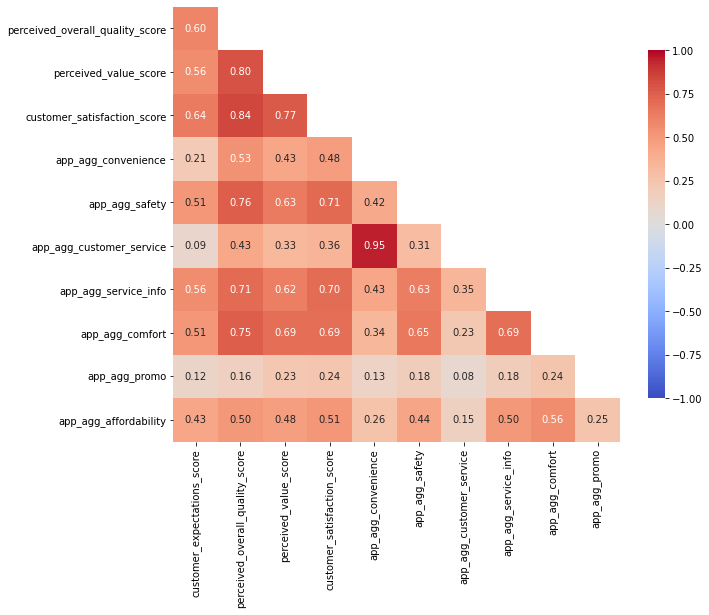

In [9]:
corr = df_app.corr()
fig, ax = plt.subplots(figsize=(10, 8))
# mask
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = corr.iloc[1:,:-1].copy()
# plot heatmap
sb.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',vmin=-1, vmax=1, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.show()

In [22]:
df_app_corr_matrix = df_app.corr(method = 'spearman').iloc[7:, 2:6]
df_app_corr_matrix

,customer_expectations_score,perceived_overall_quality_score,perceived_value_score,customer_satisfaction_score
app_agg_convenience,0.133080,0.501001,0.332131,0.411377
app_agg_safety,0.239730,0.499342,0.354348,0.399217
app_agg_customer_service,0.059335,0.515026,0.293340,0.342521
app_agg_service_info,0.287837,0.405456,0.310722,0.432319
app_agg_comfort,0.196863,0.452914,0.414116,0.314976
app_agg_promo,0.146487,0.127885,0.264051,0.241833
app_agg_affordability,0.230853,0.182892,0.238064,0.219030


In [23]:
df_app_area_corr_matrix = round(df_app.groupby(['planning_area']).corr(method = 'spearman'), 2).dropna(axis = 0, how = 'all').fillna("")
df_app_area_corr_matrix = df_app_area_corr_matrix.drop(['customer_expectations_score', 'customer_expectations_score', 'perceived_value_score', 'customer_satisfaction_score', 'perceived_overall_quality_score', 'customer_loyalty_user_trust_score'], axis = 0, level = 1)
df_app_area_corr_matrix = df_app_area_corr_matrix.drop(['app_agg_convenience', 'app_agg_safety', 'app_agg_customer_service', 'app_agg_service_info', 'app_agg_comfort', 'app_agg_promo', 'app_agg_affordability'], axis = 1)
df_app_area_corr_matrix.to_csv(r'../../../Data/CSISG/Correlation Data/df_app_area_corr_matrix.csv')

In [21]:
df_app_area_corr_matrix = round(df_app.groupby(['planning_area']).corr(), 2).dropna(axis = 0, how = 'all').fillna("")
df_app_area_corr_matrix = df_app_area_corr_matrix.drop(['customer_expectations_score', 'customer_expectations_score', 'perceived_value_score', 'customer_satisfaction_score', 'perceived_overall_quality_score', 'customer_loyalty_user_trust_score'], axis = 0, level = 1)
df_app_area_corr_matrix = df_app_area_corr_matrix.drop(['app_agg_convenience', 'app_agg_safety', 'app_agg_customer_service', 'app_agg_service_info', 'app_agg_comfort', 'app_agg_promo', 'app_agg_affordability'], axis = 1)

In [22]:
df_app_area_corr_matrix

customer_expectations_score  \
planning_area                                                         
ANGMOKIO      app_agg_convenience                              0.45   
              app_agg_safety                                   0.62   
              app_agg_customer_service                         0.30   
              app_agg_service_info                             0.70   
              app_agg_comfort                                  0.77   
              app_agg_promo                                   -0.16   
              app_agg_affordability                            0.54   
BEDOK         app_agg_convenience                              1.00   
              app_agg_safety                                   1.00   
              app_agg_customer_service                         1.00   
              app_agg_service_info                             1.00   
              app_agg_comfort                                 -1.00   
              app_agg_promo                                    1.00   
              app_agg_affordability                            1.00   
BUKITBATOK    app_agg_convenience                              0.51   
              app_agg_safety                                   0.69   
              app_agg_customer_service                         0.39   
              app_agg_service_info                             0.72   
              app_agg_comfort                                  0.84   
              app_agg_promo                                   -0.08   
              app_agg_affordability                            0.28   
BUKITMERAH    app_agg_convenience                              0.05   
              app_agg_safety                                   0.21   
              app_agg_customer_service                         0.22   
              app_agg_service_info                             0.03   
              app_agg_comfort                                 -0.76   
              app_agg_promo                                    0.16   
              app_agg_affordability                           -0.73   
BUKITPANJANG  app_agg_convenience                              0.98   
              app_agg_safety                                   0.89   
              app_agg_customer_service                         0.95   
              app_agg_service_info                             0.94   
              app_agg_comfort                                  0.94   
              app_agg_promo                                    0.99   
              app_agg_affordability                            0.97   
CHOACHUKANG   app_agg_convenience                             -0.04   
              app_agg_safety                                   0.16   
              app_agg_customer_service                        -0.10   
              app_agg_service_info                             0.96   
              app_agg_comfort                                  0.08   
              app_agg_promo                                    0.78   
              app_agg_affordability                            0.38   
CLEMENTI      app_agg_convenience                              0.52   
              app_agg_safety                                   0.89   
              app_agg_customer_service                         0.30   
              app_agg_service_info                             0.85   
              app_agg_comfort                                  0.91   
              app_agg_promo                                    0.92   
              app_agg_affordability                            0.80   
GEYLANG       app_agg_convenience                             -1.00   
              app_agg_safety                                   1.00   
              app_agg_customer_service                         1.00   
              app_agg_service_info                             1.00   
              app_agg_comfort                                 -1.00   
              app_agg_promo                                   -1

# Correlation of Buses

In [15]:
df_bus.head()

,year,sub_sector_verbatim,planning_area,weight_of_market_share,customer_expectations_score,perceived_overall_quality_score,perceived_value_score,customer_satisfaction_score,customer_loyalty‎_user_trust_score,bus_agg_service_info,bus_agg_safety,bus_agg_comfort,bus_agg_convenience,bus_agg_customer_service
0,2019,Public Buses,SENGKANG,1.00,62.61,70.06,82.83,59.71,83.56,7.666667,8.5,7.5,8.00,7.5
1,2019,Public Buses,SENGKANG,1.59,58.82,78.50,83.84,67.14,74.10,8.666667,9.0,7.5,7.75,7.0
2,2019,Public Buses,PUNGGOL,1.59,92.95,96.61,88.89,86.09,68.24,8.333333,8.5,9.5,9.25,9.0
3,2019,Public Buses,TAMPINES,1.59,89.41,74.17,76.76,69.94,72.97,8.333333,7.0,7.0,8.00,9.0
4,2019,Public Buses,ANG MO KIO,1.00,81.84,74.17,66.67,59.71,63.51,9.000000,7.5,8.0,7.50,8.0


In [16]:
df_bus_corr_matrix = df_bus.corr(method = 'spearman').iloc[7:, 2:6]
df_bus_corr_matrix

,customer_expectations_score,perceived_overall_quality_score,perceived_value_score,customer_satisfaction_score
bus_agg_service_info,0.425581,0.546361,0.516559,0.560948
bus_agg_safety,0.288614,0.604853,0.501527,0.575705
bus_agg_comfort,0.435174,0.553685,0.512568,0.562307
bus_agg_convenience,0.381948,0.667392,0.535795,0.731579
bus_agg_customer_service,0.420615,0.435145,0.410928,0.480038


In [18]:
df_bus_corr_matrix = round(df_bus.groupby(['planning_area']).corr(method = 'spearman'), 2).dropna(axis = 0, how = 'all').fillna("")
df_bus_corr_matrix.to_csv(r'../../../Data/CSISG/Correlation Data/df_bus_area_corr_matrix.csv')
df_bus_corr_matrix

year weight_of_market_share  \
planning_area                                                                   
ANG MO KIO    year                                   1                   0.87   
              weight_of_market_share              0.87                      1   
              customer_expectations_score            0                    0.5   
              perceived_overall_quality_score        0                    0.5   
              perceived_value_score               -0.5                      0   
              customer_satisfaction_score            0                    0.5   
              customer_loyalty‎_user_trust_score     0                    0.5   
              bus_agg_service_info                   0                    0.5   
              bus_agg_safety                         0                    0.5   
              bus_agg_comfort                        0                    0.5   
              bus_agg_convenience                -0.87                   -0.5   
              bus_agg_customer_service            0.87                      1   
BEDOK         year                                   1                  -0.63   
              weight_of_market_share             -0.63                      1   
              customer_expectations_score        -0.33                   0.27   
              perceived_overall_quality_score     0.03                   0.31   
              perceived_value_score               0.21                  -0.21   
              customer_satisfaction_score         0.08                   0.18   
              customer_loyalty‎_user_trust_score  0.03                   0.19   
              bus_agg_service_info                0.31                  -0.02   
              bus_agg_safety                      0.13                      0   
              bus_agg_comfort                      0.2                  -0.34   
              bus_agg_convenience                 0.08                   0.15   
              bus_agg_customer_service           -0.27                   0.82   
BISHAN        weight_of_market_share                                        1   
              customer_expectations_score                                   0   
              perceived_overall_quality_score                               0   
              perceived_value_score                                         0   
              customer_satisfaction_score                                   0   
              customer_loyalty‎_user_trust_score                            0   
              bus_agg_service_info                                          0   
              bus_agg_safety                                                0   
              bus_agg_comfort                                               0   
              bus_agg_convenience                                           0   
              bus_agg_customer_service                                   -0.5   
BUKIT BATOK   year                                   1                    0.2   
              weight_of_market_share               0.2                      1   
              customer_expectations_score            0                  -0.77   
              perceived_overall_quality_score    -0.36                  -0.45   
              perceived_value_score              -0.12                  -0.16   
              customer_satisfaction_score        -0.46                  -0.58   
              customer_loyalty‎_user_trust_score -0.46                  -0.55   
              bus_agg_service_info                 0.1                  -0.59   
              bus_agg_safety                     -0.48                  -0.18   
              bus_agg_comfort                    -0.01                  -0.33   
              bus_agg_convenience                -0.54                  -0.21   
              bus_agg_customer_service            0.51                   -0.4   
BUKIT PANJANG customer_expectations_score                                       
